In [ ]:
from google.colab import drive
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Mount Google Drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/ABIA Project/Traffic_Violations.csv' # Example path

try:
    # Load the dataset into a pandas DataFrame
    df = pd.read_csv(dataset_path)

    # Display the first few rows of the DataFrame
    print("Dataset loaded successfully!")
    display(df.head())

except FileNotFoundError:
    print(f"Error: The file was not found at '{dataset_path}'")
    print("Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded successfully!


,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Search Conducted,Search Disposition,Search Outcome,Search Reason,Search Reason For Stop,Search Type,Search Arrest Reason,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,52282e8c-f2e1-4bb5-8509-2d5e4f8da8ca,05/01/2023,23:11:00,MCP,"3rd District, Silver Spring",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,BRIGGS CHANEY RD @ COLUMIBA PIKE,0.000000,0.00000,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,17-107(a1),NaN,NaN,MD,02 - Automobile,2007.0,CHEV,CRUZ,BLACK,Citation,13-401(b1),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
1,b66f253b-af29-4bc4-bb73-93755ca2a779,08/31/2023,16:41:00,MCP,"6th District, Gaithersburg / Montgomery Village",DRIVING TO DRIVE MOTOR VEHICLE ON HIGHWAY WITHOUT REQUIRED LICENSE AND AUTHORIZATION,OAKMONT AVE @ GROVEMONT CIR,39.097965,-77.15301,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,20-102(a1),NaN,NaN,MD,02 - Automobile,2005.0,FORD,EXPLORER,BLACK,Citation,16-101(a1),Transportation Article,False,HISPANIC,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.097965, -77.15301)"
2,b66f253b-af29-4bc4-bb73-93755ca2a779,08/31/2023,16:41:00,MCP,"6th District, Gaithersburg / Montgomery Village",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER,OAKMONT AVE @ GROVEMONT CIR,39.097965,-77.15301,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,20-102(a1),NaN,NaN,MD,02 - Automobile,2005.0,FORD,EXPLORER,BLACK,Citation,13-409(b),Transportation Article,False,HISPANIC,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.097965, -77.15301)"
3,b66f253b-af29-4bc4-bb73-93755ca2a779,08/31/2023,16:41:00,MCP,"6th District, Gaithersburg / Montgomery Village",DRIVER OF MOTOR VEHICLE FOLLOWING VEHICLE CLOSER THAN REASONABLE AND PRUDENT,OAKMONT AVE @ GROVEMONT CIR,39.097965,-77.15301,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,20-102(a1),NaN,NaN,MD,02 - Automobile,2005.0,FORD,EXPLORER,BLACK,Citation,21-310(a),Transportation Article,False,HISPANIC,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.097965, -77.15301)"
4,b66f253b-af29-4bc4-bb73-93755ca2a779,08/31/2023,16:41:00,MCP,"6th District, Gaithersburg / Montgomery Village",FAILURE TO CONTROL VEH. SPEED ON HWY. TO AVOID COLLISION,OAKMONT AVE @ GROVEMONT CIR,39.097965,-77.15301,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,20-102(a1),NaN,NaN,MD,02 - Automobile,2005.0,FORD,EXPLORER,BLACK,Citation,21-801(b),Transportation Article,False,HISPANIC,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.097965, -77.15301)"


In [ ]:
# Count the occurrences of each state in the 'Driver State' column of the original DataFrame
state_counts = df['Driver State'].value_counts()

# Display the state counts
print("Count of each state in the dataset:")
display(state_counts.head(10)) # Display top 10 states

Count of each state in the dataset:


,count
Driver State,
MD,1842081
DC,67039
VA,62066
PA,10088
FL,7111
NY,6190
NC,4690
WV,4341
CA,3697


| State                     | Snowy?            | Notes                                                               |
| ------------------------- | ----------------- | ------------------------------------------------------------------- |
| **MD (Maryland)**         | ✅ Yes             | Western MD (Allegheny Mountains) gets heavy snow.                   |
| **DC (Washington, D.C.)** | ✅ Yes (light)     | Snow some winters, but lighter than nearby states.                  |
| **VA (Virginia)**         | ✅ Yes (mountains) | Blue Ridge & Appalachians get snow.                                 |
| **PA (Pennsylvania)**     | ✅ Yes             | Regular heavy snow in many regions (Poconos, western PA).           |
| **FL (Florida)**          | ❌ No              | Very rare snow, not a snowy state.                                  |
| **NY (New York)**         | ✅ Yes             | Upstate NY among the snowiest (Buffalo, Syracuse).                  |
| **NC (North Carolina)**   | ⚠️ Partial         | Snow in Appalachian mountains, little elsewhere.                    |
| **WV (West Virginia)**    | ✅ Yes             | Mountainous state, gets consistent snow.                            |
| **CA (California)**       | ⚠️ Partial         | Sierra Nevada & northern mountains get heavy snow; most areas mild. |
| **NJ (New Jersey)**       | ✅ Yes             | Northern NJ gets regular snow in winter.                            |


| State                     | Comparison to NC              | Notes                                                                 |
| ------------------------- | ----------------------------- | --------------------------------------------------------------------- |
| **NC (North Carolina)**   | Baseline                      | Snow mainly in Appalachian mountains; mild elsewhere.                  |
| **MD (Maryland)**         | Snows more than NC            | Western MD mountains get heavier, more consistent snow.                |
| **DC (Washington, D.C.)** | Snows similarly to NC         | Occasional winter snow, lighter overall, comparable to central NC.     |
| **VA (Virginia)**         | Snows more than NC (mountains)| Blue Ridge/Appalachians get heavier snow than NC mountains.            |
| **PA (Pennsylvania)**     | Snows more than NC            | Regular snow across much of the state, especially in Poconos & west.   |
| **FL (Florida)**          | Snows much less than NC       | Rare snowfall, not comparable.                                         |
| **NY (New York)**         | Snows far more than NC        | Upstate NY among snowiest in U.S. (Buffalo, Syracuse, Adirondacks).    |
| **WV (West Virginia)**    | Snows more than NC            | Mountainous regions receive heavier and longer-lasting snow.           |
| **CA (California)**       | Mixed: Snows more (mountains) | Sierra Nevada gets huge snow; coastal/lowland areas see none.          |
| **NJ (New Jersey)**       | Snows more than NC            | Northern NJ gets more regular snow than NC lowlands.                   |


In [ ]:
# --- Data Cleaning and Preprocessing ---

# 1. Combine Date and Time and convert to datetime object
df['DateTime'] = pd.to_datetime(df['Date Of Stop'] + ' ' + df['Time Of Stop'])

# 2. Handle missing/invalid Latitude and Longitude
# Remove rows where Latitude or Longitude is 0.0 or NaN
df = df[df['Latitude'] != 0.0]
df = df[df['Longitude'] != 0.0]
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# 3. Convert 'Accident' column to numeric (1 for Yes, 0 for No)
df['Accident'] = df['Accident'].apply(lambda x: 1 if x == 'Yes' else 0)

# 4. Drop unnecessary columns
columns_to_drop = [
    'SeqID', 'Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency',
    'Belts', 'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
    'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'Search Conducted',
    'Search Disposition', 'Search Outcome', 'Search Reason', 'Search Reason For Stop',
    'Search Type', 'Search Arrest Reason', 'Violation Type', 'Charge',
    'Article', 'Driver City', 'Driver State', 'DL State', 'Arrest Type', 'Geolocation'
]
df.drop(columns=columns_to_drop, inplace=True)


# --- Display Cleaned Data Info ---
print("\n--- Cleaned Data ---")
print(df.head())
print("\n--- Data Info ---")
df.info()


--- Cleaned Data ---
                                                                            Description  \
1  DRIVING TO DRIVE MOTOR VEHICLE ON HIGHWAY WITHOUT REQUIRED LICENSE AND AUTHORIZATION   
2                    FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER   
3          DRIVER OF MOTOR VEHICLE FOLLOWING VEHICLE CLOSER THAN REASONABLE AND PRUDENT   
4                              FAILURE TO CONTROL VEH. SPEED ON HWY. TO AVOID COLLISION   
5                                DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION   

                       Location   Latitude  Longitude  Accident State  \
1   OAKMONT AVE @ GROVEMONT CIR  39.097965 -77.153010         0    MD   
2   OAKMONT AVE @ GROVEMONT CIR  39.097965 -77.153010         0    MD   
3   OAKMONT AVE @ GROVEMONT CIR  39.097965 -77.153010         0    MD   
4   OAKMONT AVE @ GROVEMONT CIR  39.097965 -77.153010         0    MD   
5  KEMP MILL ROAD @ ALPERT LANE  39.053038 -77.024637         0   

In [ ]:
# --- State Filtering ---

# List of states you want to include in your analysis
states_to_include = ['NC', 'PA', 'DC', 'FL', 'NY', 'CA']

# Create a new DataFrame that only contains rows with the specified states
df_filtered = df[df['State'].isin(states_to_include)].copy()

# --- Display Filtered Data Info ---
print(f"\n--- Original DataFrame size: {len(df)} rows ---")
print(f"--- Filtered DataFrame size: {len(df_filtered)} rows ---")
print("\nDistribution of records by state in the filtered dataset:")
print(df_filtered['State'].value_counts()) # Shows how many records for each state
print("\n--- Filtered Data Info ---")
df_filtered.info()


--- Original DataFrame size: 1886375 rows ---
--- Filtered DataFrame size: 84963 rows ---

Distribution of records by state in the filtered dataset:
State
DC    46735
PA    13034
FL     9144
NC     6869
NY     5998
CA     3183
Name: count, dtype: int64

--- Filtered Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 84963 entries, 70 to 2037886
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Description              84963 non-null  object        
 1   Location                 84963 non-null  object        
 2   Latitude                 84963 non-null  float64       
 3   Longitude                84963 non-null  float64       
 4   Accident                 84963 non-null  int64         
 5   State                    84963 non-null  object        
 6   VehicleType              84963 non-null  object        
 7   Year                     84963 non-null  float64       
 

In [ ]:
import pandas as pd
import requests
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed

# --- Step 1: Find unique location-day combinations (same as before) ---
df_filtered['lat_round'] = df_filtered['Latitude'].round(4)
df_filtered['lon_round'] = df_filtered['Longitude'].round(4)
df_filtered['date_only'] = df_filtered['DateTime'].dt.date

unique_locations_days = df_filtered[['date_only', 'lat_round', 'lon_round']].drop_duplicates().to_dict('records')

print(f"Original records: {len(df_filtered)}")
print(f"Unique API calls to make (in parallel): {len(unique_locations_days)}")

# --- Step 2: Define a function to fetch data for ONE location-day group ---
def fetch_weather_for_group(group):
    """Fetches a 24-hour forecast for a single group."""
    try:
        date_str = group['date_only'].strftime('%Y-%m-%d')
        lat = group['lat_round']
        lon = group['lon_round']

        url = (f"https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lon}"
               f"&start_date={date_str}&end_date={date_str}"
               f"&hourly=temperature_2m,precipitation,snowfall,weathercode,windspeed_10m")

        response = requests.get(url)
        response.raise_for_status()

        # Return the key and the resulting hourly data
        key = (group['date_only'], lat, lon)
        return key, response.json()['hourly']
    except Exception:
        # Return the key and None if there's an error
        key = (group['date_only'], lat, lon)
        return key, None

# --- Step 3: Build the cache in parallel using a ThreadPoolExecutor ---
weather_cache = {}
# Use up to 10 workers (threads) to make requests concurrently
with ThreadPoolExecutor(max_workers=10) as executor:
    # Submit all fetch tasks to the executor
    future_to_group = {executor.submit(fetch_weather_for_group, group): group for group in unique_locations_days}

    # Process results as they are completed, with a progress bar
    for future in tqdm(as_completed(future_to_group), total=len(unique_locations_days), desc="Building Weather Cache (Parallel)"):
        key, hourly_data = future.result()
        weather_cache[key] = hourly_data

# --- Step 4: Look up weather data from the local cache (same as before) ---
def lookup_weather_from_cache(row):
    key = (row['date_only'], row['lat_round'], row['lon_round'])
    hourly_data = weather_cache.get(key)
    if hourly_data:
        hour = row['DateTime'].hour
        return {
            'temperature': hourly_data.get('temperature_2m', [None]*24)[hour],
            'precipitation': hourly_data.get('precipitation', [None]*24)[hour],
            'snowfall': hourly_data.get('snowfall', [None]*24)[hour],
            'weathercode': hourly_data.get('weathercode', [None]*24)[hour],
            'windspeed': hourly_data.get('windspeed_10m', [None]*24)[hour]
        }
    return None

tqdm.pandas(desc="Applying weather data from cache")
weather_results = df_filtered.progress_apply(lookup_weather_from_cache, axis=1)

# --- Combine results and save the file (same as before) ---
weather_df = weather_results.apply(pd.Series)
df_final_filtered = pd.concat([df_filtered, weather_df], axis=1)
df_final_filtered.drop(columns=['lat_round', 'lon_round', 'date_only'], inplace=True)
df_final_filtered.to_csv('traffic_violations_with_detailed_weather.csv', index=False)

print("\n--- Processing Complete! ---")
print("Final DataFrame with detailed weather data:")
print(df_final_filtered.head())

Original records: 84963
Unique API calls to make (in parallel): 48813


Applying weather data from cache: 100%|██████████| 84963/84963 [00:04<00:00, 18510.47it/s]



--- Processing Complete! ---
Final DataFrame with detailed weather data:
                                                                                         Description  \
70                             EXCEEDING POSTED MAXIMUM SPEED LIMIT: 100 MPH IN A POSTED 55 MPH ZONE   
71  PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUBLIC USE PROPERTY ON SUSPENDED OUT-OF-STATE LICENSE   
90                 FAILURE TO DISPLAY & REFLECT RED COLOR LIGHT ON REAR LAMPS AND REFLECTORS AS REQ.   
91                                                        EXCEEDING THE POSTED SPEED LIMIT OF 55 MPH   
92                        DRIVING VEHICLE IN EXCESS OF REASONABLE AND PRUDENT SPEED ON HIGHWAY 85/55   

                    Location   Latitude  Longitude  Accident State  \
70  S/B RT 270 L/N 2 @ RT 28  39.049092 -77.151733         0    NY   
71  S/B RT 270 L/N 2 @ RT 28  39.049092 -77.151733         0    NY   
90  SB I270 @ MIDDLEBROOK RD  39.159367 -77.230083         0    DC   
91  SB I270 @ MIDDLEB

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset you created in the last step
try:
    df = pd.read_csv('traffic_violations_with_detailed_weather.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'traffic_violations_with_detailed_weather.csv' not found.")
    exit()

# Ensure DateTime is in the correct format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# --- 1. Create Time-Based Features ---
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.day_name() # e.g., 'Monday'
df['Month'] = df['DateTime'].dt.month

# --- 2. Create Part of Day Feature ---
def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['PartOfDay'] = df['Hour'].apply(get_part_of_day)

# --- 3. Create Weather Condition Feature ---
# Mapping from WMO Weather Interpretation Codes to human-readable categories
weather_code_map = {
    0: 'Clear', 1: 'Mainly Clear', 2: 'Partly Cloudy', 3: 'Overcast',
    45: 'Fog', 48: 'Depositing Rime Fog',
    51: 'Light Drizzle', 53: 'Moderate Drizzle', 55: 'Dense Drizzle',
    56: 'Light Freezing Drizzle', 57: 'Dense Freezing Drizzle',
    61: 'Slight Rain', 63: 'Moderate Rain', 65: 'Heavy Rain',
    66: 'Light Freezing Rain', 67: 'Heavy Freezing Rain',
    71: 'Slight Snowfall', 73: 'Moderate Snowfall', 75: 'Heavy Snowfall',
    77: 'Snow Grains',
    80: 'Slight Rain Showers', 81: 'Moderate Rain Showers', 82: 'Violent Rain Showers',
    85: 'Slight Snow Showers', 86: 'Heavy Snow Showers',
    95: 'Thunderstorm', 96: 'Thunderstorm with Slight Hail', 99: 'Thunderstorm with Heavy Hail'
}

# Map the codes and group anything not explicitly defined into 'Other'
df['WeatherCondition'] = df['weathercode'].map(weather_code_map).fillna('Other')


# --- Display the DataFrame with new features ---
print("\n--- DataFrame with New Engineered Features ---")
# Displaying relevant columns to see the new features
print(df[['DateTime', 'Hour', 'DayOfWeek', 'PartOfDay', 'weathercode', 'WeatherCondition', 'Accident']].head())

print("\n--- New Features Created ---")
print(df.info())

Dataset loaded successfully!

--- DataFrame with New Engineered Features ---
             DateTime  Hour DayOfWeek PartOfDay  weathercode WeatherCondition  \
0 2023-09-01 00:25:00     0    Friday     Night          0.0            Clear   
1 2023-09-01 00:25:00     0    Friday     Night          0.0            Clear   
2 2023-04-30 02:59:00     2    Sunday     Night         51.0    Light Drizzle   
3 2023-04-30 02:59:00     2    Sunday     Night         51.0    Light Drizzle   
4 2023-04-30 02:59:00     2    Sunday     Night         51.0    Light Drizzle   

   Accident  
0         0  
1         0  
2         0  
3         0  
4         0  

--- New Features Created ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84963 entries, 0 to 84962
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Description              84963 non-null  object        
 1   Location                 

In [ ]:
import pandas as pd

# Load the dataset with engineered features
df = pd.read_csv('traffic_violations_with_detailed_weather.csv')

# --- Data Cleaning: Remove rows with missing weather data ---
# We'll check the 'temperature' column; if it's null, all weather data is missing.
df_clean = df.dropna(subset=['temperature']).copy()

print(f"Rows before cleaning: {len(df)}")
print(f"Rows after cleaning: {len(df_clean)}")
print(f"Missing rows removed: {len(df) - len(df_clean)}")

# Save the final, clean dataset
df_clean.to_csv('traffic_violations_final.csv', index=False)
print("\nClean dataset saved as 'traffic_violations_final.csv'")

Rows before cleaning: 84963
Rows after cleaning: 31707
Missing rows removed: 53256

Clean dataset saved as 'traffic_violations_final.csv'


Final dataset loaded for EDA!


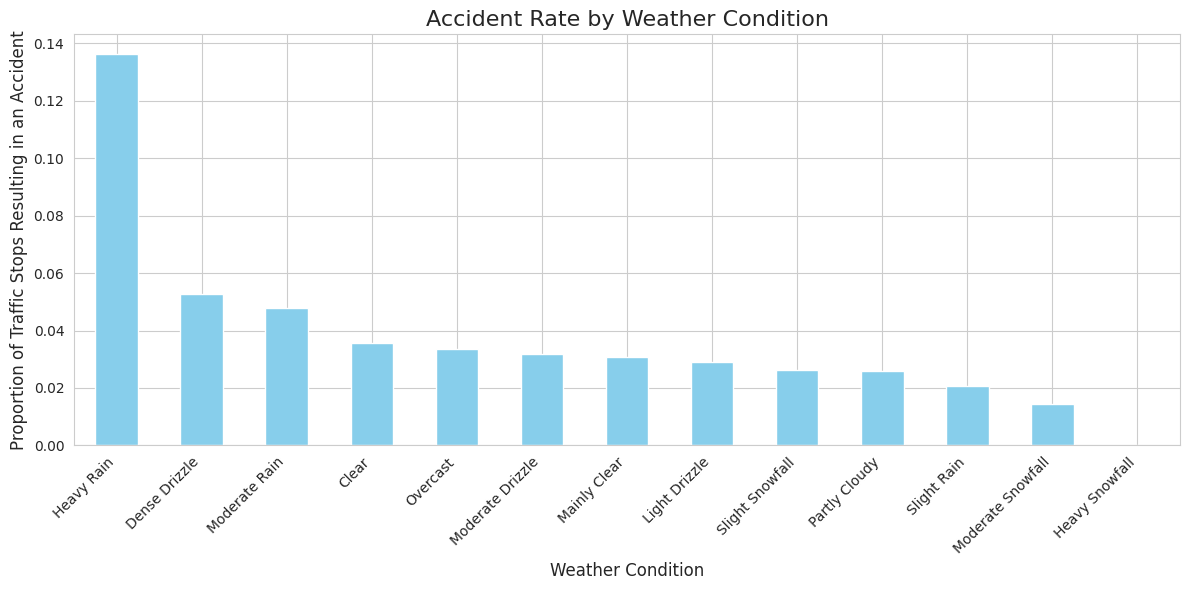

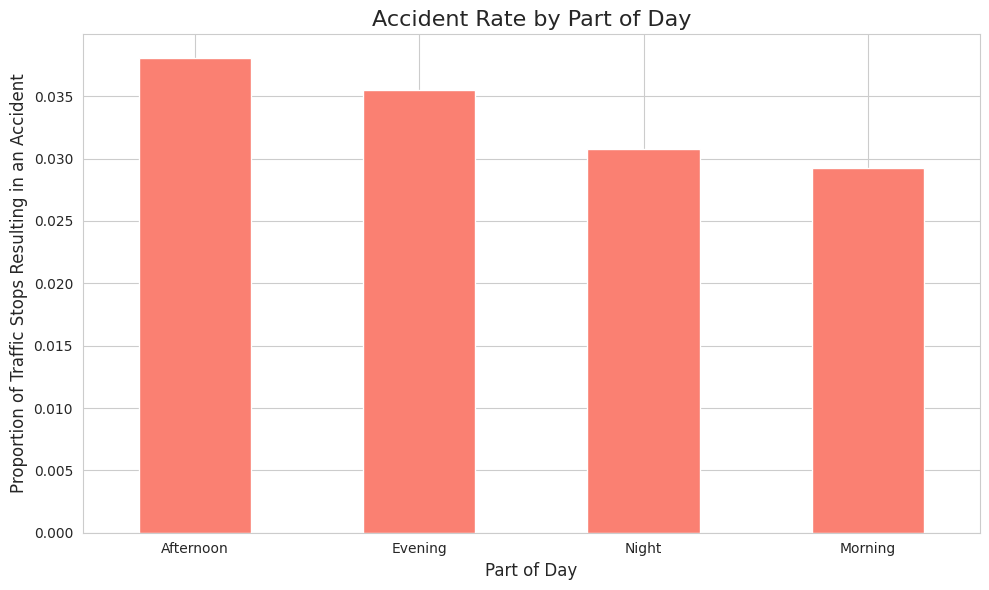

/tmp/ipython-input-14224458.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Accident']==1], x='DayOfWeek', order=day_order, palette='viridis')


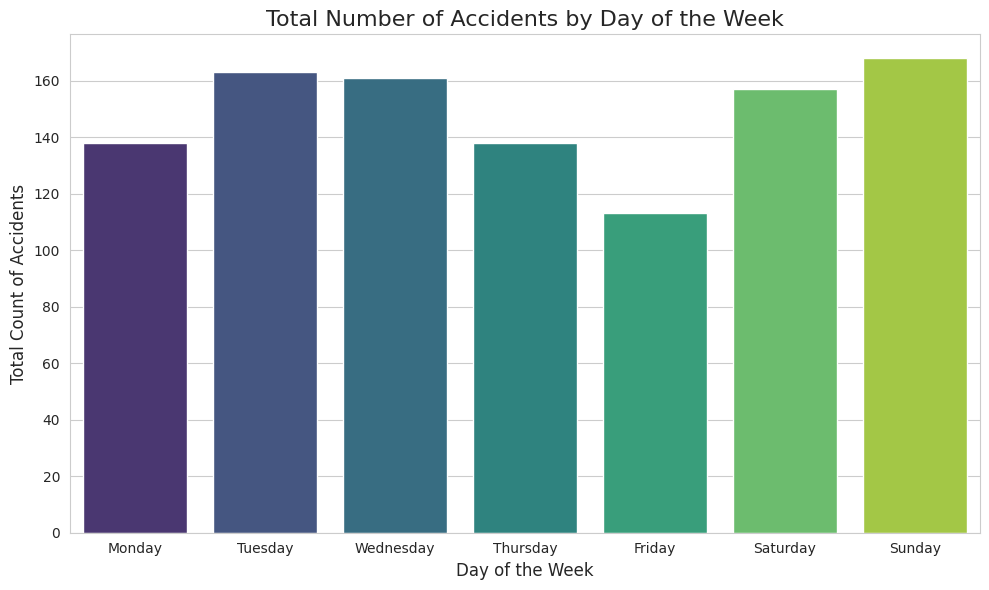

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the FINAL clean dataset
try:
    df = pd.read_csv('traffic_violations_final.csv')
    print("Final dataset loaded for EDA!")
except FileNotFoundError:
    print("Error: 'traffic_violations_final.csv' not found. Please make sure the file was created in the previous step.")
    exit()

# --- FIX: Re-create the 'WeatherCondition' column to ensure it exists ---
# Mapping from WMO Weather Interpretation Codes
weather_code_map = {
    0: 'Clear', 1: 'Mainly Clear', 2: 'Partly Cloudy', 3: 'Overcast',
    45: 'Fog', 48: 'Depositing Rime Fog',
    51: 'Light Drizzle', 53: 'Moderate Drizzle', 55: 'Dense Drizzle',
    56: 'Light Freezing Drizzle', 57: 'Dense Freezing Drizzle',
    61: 'Slight Rain', 63: 'Moderate Rain', 65: 'Heavy Rain',
    66: 'Light Freezing Rain', 67: 'Heavy Freezing Rain',
    71: 'Slight Snowfall', 73: 'Moderate Snowfall', 75: 'Heavy Snowfall',
    77: 'Snow Grains',
    80: 'Slight Rain Showers', 81: 'Moderate Rain Showers', 82: 'Violent Rain Showers',
    85: 'Slight Snow Showers', 86: 'Heavy Snow Showers',
    95: 'Thunderstorm', 96: 'Thunderstorm with Slight Hail', 99: 'Thunderstorm with Heavy Hail'
}
# Map the codes and group anything else into 'Other'
df['WeatherCondition'] = df['weathercode'].map(weather_code_map).fillna('Other')

# --- FIX: Re-create 'PartOfDay' column as well ---
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Hour'] = df['DateTime'].dt.hour
def get_part_of_day(hour):
    if 5 <= hour < 12: return 'Morning'
    elif 12 <= hour < 17: return 'Afternoon'
    elif 17 <= hour < 21: return 'Evening'
    else: return 'Night'
df['PartOfDay'] = df['Hour'].apply(get_part_of_day)


# Set the style for our plots
sns.set_style("whitegrid")

# --- Plot 1: Accident Rate by Weather Condition ---
plt.figure(figsize=(12, 6))
weather_accident_rate = df.groupby('WeatherCondition')['Accident'].value_counts(normalize=True).unstack().fillna(0)
# Check if there is an 'Accident' column (column named 1) before plotting
if 1 in weather_accident_rate.columns:
    weather_accident_rate[1].sort_values(ascending=False).plot(kind='bar', color='skyblue')
else:
    print("No accidents found in the dataset to plot by weather.")
plt.title('Accident Rate by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Proportion of Traffic Stops Resulting in an Accident', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- Plot 2: Accident Rate by Part of Day ---
plt.figure(figsize=(10, 6))
part_of_day_rate = df.groupby('PartOfDay')['Accident'].value_counts(normalize=True).unstack().fillna(0)
if 1 in part_of_day_rate.columns:
    part_of_day_rate[1].sort_values(ascending=False).plot(kind='bar', color='salmon')
else:
    print("No accidents found in the dataset to plot by part of day.")
plt.title('Accident Rate by Part of Day', fontsize=16)
plt.xlabel('Part of Day', fontsize=12)
plt.ylabel('Proportion of Traffic Stops Resulting in an Accident', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Plot 3: Number of Accidents by Day of the Week ---
plt.figure(figsize=(10, 6))
df['DayOfWeek'] = df['DateTime'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df[df['Accident']==1], x='DayOfWeek', order=day_order, palette='viridis')
plt.title('Total Number of Accidents by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Count of Accidents', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the final clean dataset
df = pd.read_csv('traffic_violations_final.csv')

# --- 1. FIX: Re-create the Engineered Features ---

# Re-create time-based features
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.day_name()
df['Month'] = df['DateTime'].dt.month

# Re-create PartOfDay feature
def get_part_of_day(hour):
    if 5 <= hour < 12: return 'Morning'
    elif 12 <= hour < 17: return 'Afternoon'
    elif 17 <= hour < 21: return 'Evening'
    else: return 'Night'
df['PartOfDay'] = df['Hour'].apply(get_part_of_day)

# Re-create WeatherCondition feature
weather_code_map = {
    0: 'Clear', 1: 'Mainly Clear', 2: 'Partly Cloudy', 3: 'Overcast', 45: 'Fog',
    48: 'Depositing Rime Fog', 51: 'Light Drizzle', 53: 'Moderate Drizzle', 55: 'Dense Drizzle',
    56: 'Light Freezing Drizzle', 57: 'Dense Freezing Drizzle', 61: 'Slight Rain',
    63: 'Moderate Rain', 65: 'Heavy Rain', 66: 'Light Freezing Rain', 67: 'Heavy Freezing Rain',
    71: 'Slight Snowfall', 73: 'Moderate Snowfall', 75: 'Heavy Snowfall', 77: 'Snow Grains',
    80: 'Slight Rain Showers', 81: 'Moderate Rain Showers', 82: 'Violent Rain Showers',
    85: 'Slight Snow Showers', 86: 'Heavy Snow Showers', 95: 'Thunderstorm',
    96: 'Thunderstorm with Slight Hail', 99: 'Thunderstorm with Heavy Hail'
}
df['WeatherCondition'] = df['weathercode'].map(weather_code_map).fillna('Other')


# --- 2. Feature Selection and Encoding ---
features = [
    'temperature', 'precipitation', 'snowfall', 'windspeed',
    'Hour', 'DayOfWeek', 'Month', 'PartOfDay', 'WeatherCondition',
    'VehicleType', 'State', 'Gender'
]
target = 'Accident'

df_model = df[features + [target]].copy()

categorical_features = ['DayOfWeek', 'Month', 'PartOfDay', 'WeatherCondition', 'VehicleType', 'State', 'Gender']
df_model = pd.get_dummies(df_model, columns=categorical_features, drop_first=True)

print("--- Data Ready for Modeling (with one-hot encoding) ---")
print(df_model.head())

# --- 3. Splitting the Data into Training and Testing Sets ---
X = df_model.drop(target, axis=1)
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- Data Splitting Complete ---")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

--- Data Ready for Modeling (with one-hot encoding) ---
   temperature  precipitation  snowfall  windspeed  Hour  Accident  \
0         22.1            0.0       0.0        9.3     0         0   
1         22.1            0.0       0.0        9.3     0         0   
2         14.7            0.1       0.0       13.9     2         0   
3         14.7            0.1       0.0       13.9     2         0   
4         14.7            0.1       0.0       13.9     2         0   

   DayOfWeek_Monday  DayOfWeek_Saturday  DayOfWeek_Sunday  DayOfWeek_Thursday  \
0             False               False             False               False   
1             False               False             False               False   
2             False               False              True               False   
3             False               False              True               False   
4             False               False              True               False   

   DayOfWeek_Tuesday  DayOfWeek_Wedn

--- Training the model... ---
--- Model training complete! ---

Model Accuracy: 0.9819

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6134
           1       0.83      0.56      0.67       208

    accuracy                           0.98      6342
   macro avg       0.91      0.78      0.83      6342
weighted avg       0.98      0.98      0.98      6342


Confusion Matrix:


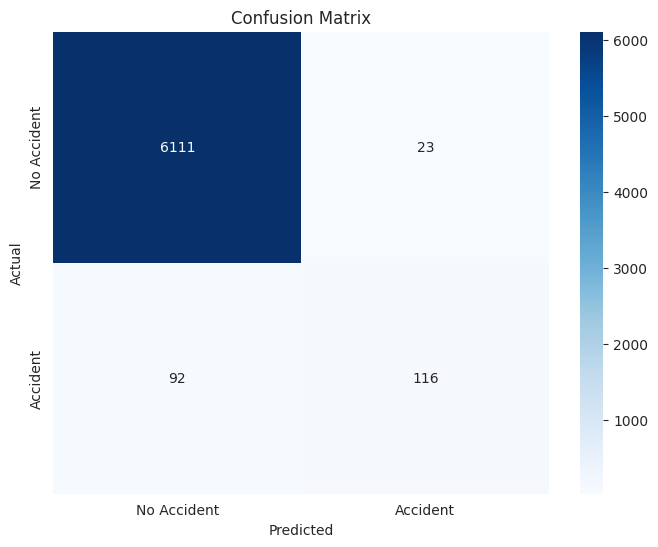

/tmp/ipython-input-3603954665.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


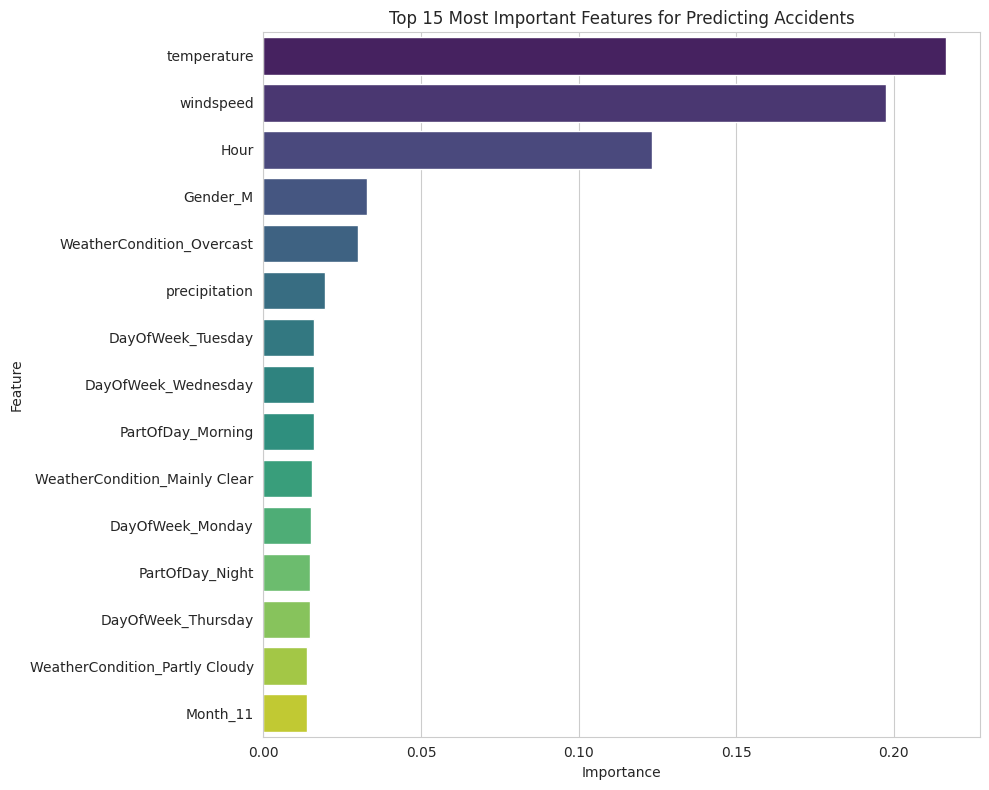

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Train the Random Forest Model ---
# We'll start with 100 trees, a common and effective default
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("--- Training the model... ---")
model.fit(X_train, y_train)
print("--- Model training complete! ---")


# --- 2. Make Predictions on the Test Data ---
y_pred = model.predict(X_test)


# --- 3. Evaluate the Model's Performance ---
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Accident', 'Accident'], yticklabels=['No Accident', 'Accident'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# --- 4. Feature Importance ---
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance and get the top 15 features
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 15 Most Important Features for Predicting Accidents')
plt.tight_layout()
plt.show()

--- Training the improved (balanced) model... ---
--- Model training complete! ---

--- Improved Model Results ---

Model Accuracy: 0.9775

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6134
           1       0.67      0.62      0.65       208

    accuracy                           0.98      6342
   macro avg       0.83      0.81      0.82      6342
weighted avg       0.98      0.98      0.98      6342


Confusion Matrix:


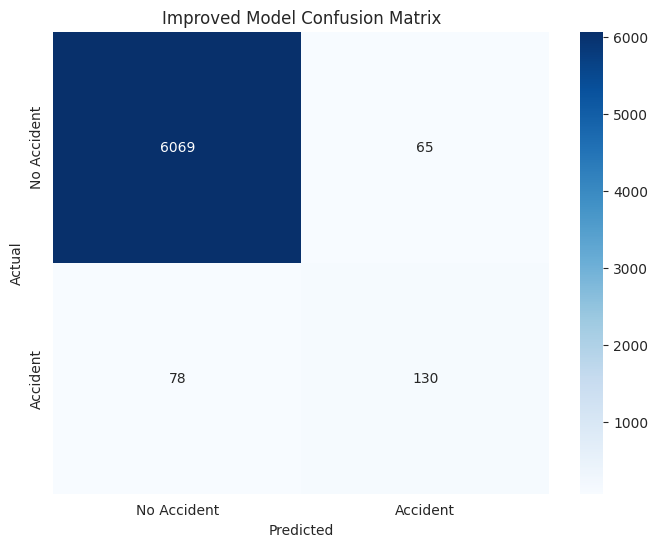

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Train the Improved Random Forest Model ---
# The only change is adding class_weight='balanced'
model_balanced = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced', # This tells the model to penalize mistakes on the minority class more
    n_jobs=-1
)

print("--- Training the improved (balanced) model... ---")
model_balanced.fit(X_train, y_train)
print("--- Model training complete! ---")


# --- 2. Make Predictions on the Test Data ---
y_pred_balanced = model_balanced.predict(X_test)


# --- 3. Evaluate the Improved Model's Performance ---
print("\n--- Improved Model Results ---")
accuracy = accuracy_score(y_test, y_pred_balanced)
print(f"\nModel Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_balanced))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_balanced)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Accident', 'Accident'], yticklabels=['No Accident', 'Accident'])
plt.title('Improved Model Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
import joblib

# After training 'model_balanced', save it to a file
joblib.dump(model_balanced, 'accident_predictor_model.pkl')

# Also save the list of columns the model was trained on
joblib.dump(X_train.columns, 'model_columns.pkl')

['model_columns.pkl']